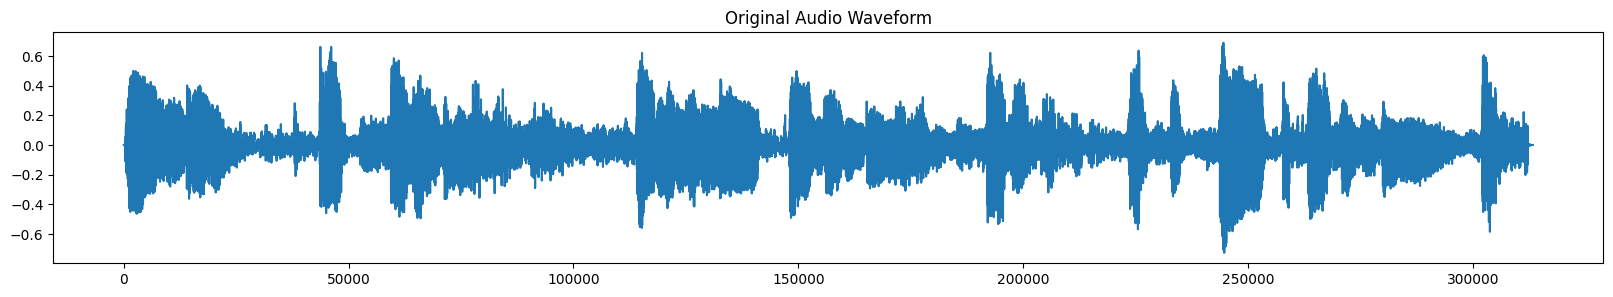

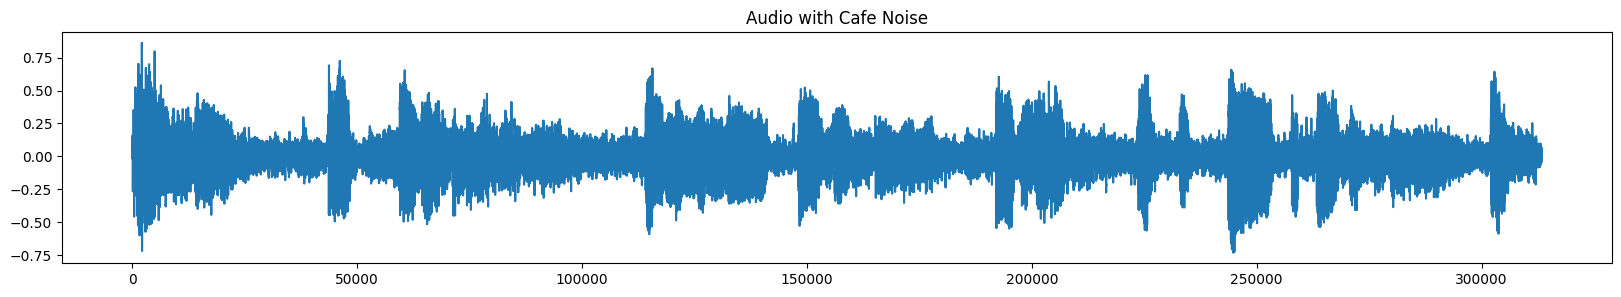

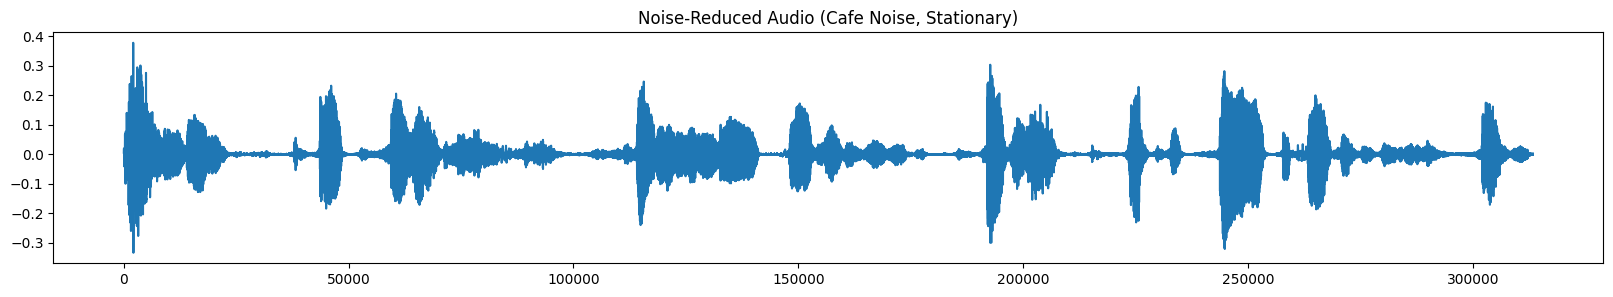

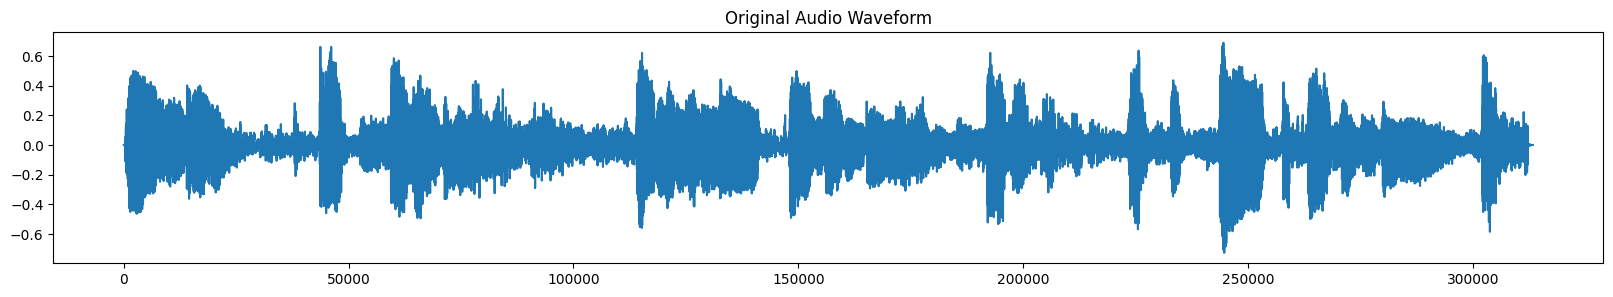

In [ ]:
# Install necessary libraries
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",
]

import sys, subprocess

def run_subprocess_command(cmd):
    # Run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # Print the output
    for line in process.stdout:
        print(line.decode().strip())

# Check if running in Colab
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

# Importing libraries
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt
import noisereduce as nr
import soundfile as sf  # For saving the audio files
import numpy as np
from scipy.signal import butter, lfilter

# Function to create band-limited noise
def band_limited_noise(min_freq, max_freq, samples, samplerate):
    # Generate white noise
    noise = np.random.normal(0, 1, samples)

    # Design a band-pass filter to keep frequencies between min_freq and max_freq
    nyquist = 0.5 * samplerate
    low = min_freq / nyquist
    high = max_freq / nyquist
    b, a = butter(1, [low, high], btype="band")

    # Apply the band-pass filter to the noise
    band_limited_noise = lfilter(b, a, noise)
    return band_limited_noise

# Load MP3 file using librosa
mp3_file = "/content/WhatsApp Audio 2024-10-24 at 13.43.58_e98e5504.mp3"  # Replace with the path to your MP3 file
data, rate = librosa.load(mp3_file, sr=None)  # sr=None preserves the original sample rate

# Plot and play the original audio
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot(data)
plt.title("Original Audio Waveform")
plt.show()

# Play the original MP3 audio
ipd.display(ipd.Audio(data=data, rate=rate))
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/cafe_short.wav"
import urllib.request
import io

response = urllib.request.urlopen(url)
noise_data, noise_rate = sf.read(io.BytesIO(response.read()))

# Ensure the noise length matches the audio length by repeating the noise
if len(noise_data) < len(data):
    # Repeat the noise to match the length of the original audio
    repeat_factor = int(np.ceil(len(data) / len(noise_data)))
    noise_data = np.tile(noise_data, repeat_factor)[:len(data)]  # Tile and then trim to match

# Add the noise to the audio
snr = 2  # signal to noise ratio
noise_clip = noise_data / snr
audio_clip_with_cafe_noise = data + noise_clip

# Plot and play the noisy audio (with cafe noise)
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot(audio_clip_with_cafe_noise)
plt.title("Audio with Cafe Noise")
plt.show()

# Play the noisy audio (with cafe noise)
ipd.display(ipd.Audio(data=audio_clip_with_cafe_noise, rate=rate))

# Apply stationary noise reduction on cafe noise
reduced_cafe_noise_stationary = nr.reduce_noise(y=audio_clip_with_cafe_noise, sr=rate, stationary=True)

# Plot and play the cafe noise-reduced audio (stationary)
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot(reduced_cafe_noise_stationary)
plt.title("Noise-Reduced Audio (Cafe Noise, Stationary)")
plt.show()

# Play the noise-reduced audio (stationary cafe noise)
ipd.display(ipd.Audio(data=reduced_cafe_noise_stationary, rate=rate))
#mp3_file = "/content/WhatsApp Audio 2024-10-16 at 17.48.51_ba230fba.waptt (online-audio-converter.com).mp3"  # Replace with the path to your MP3 file
#data, rate = librosa.load(mp3_file, sr=None)  # sr=None preserves the original sample rate

# Plot and play the original audio
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot(data)
plt.title("Original Audio Waveform")
plt.show()

# Play the original MP3 audio
ipd.display(ipd.Audio(data=data, rate=rate))


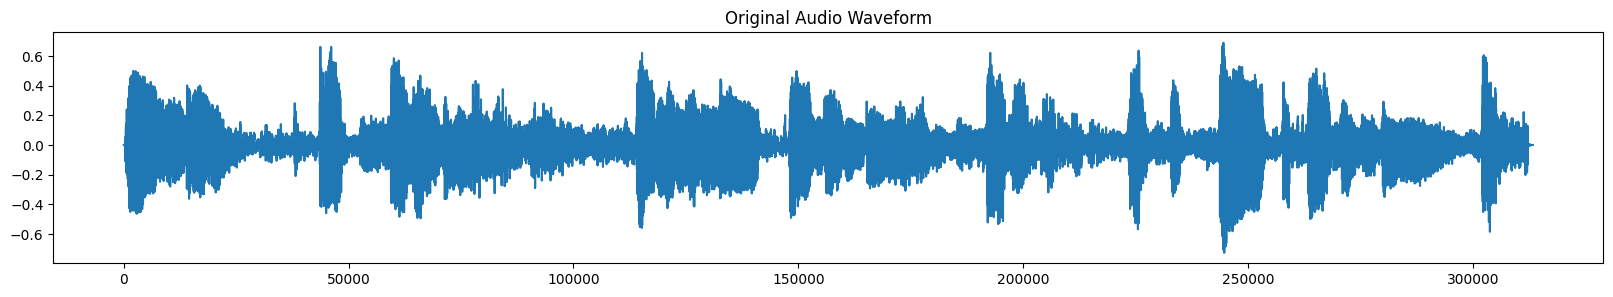

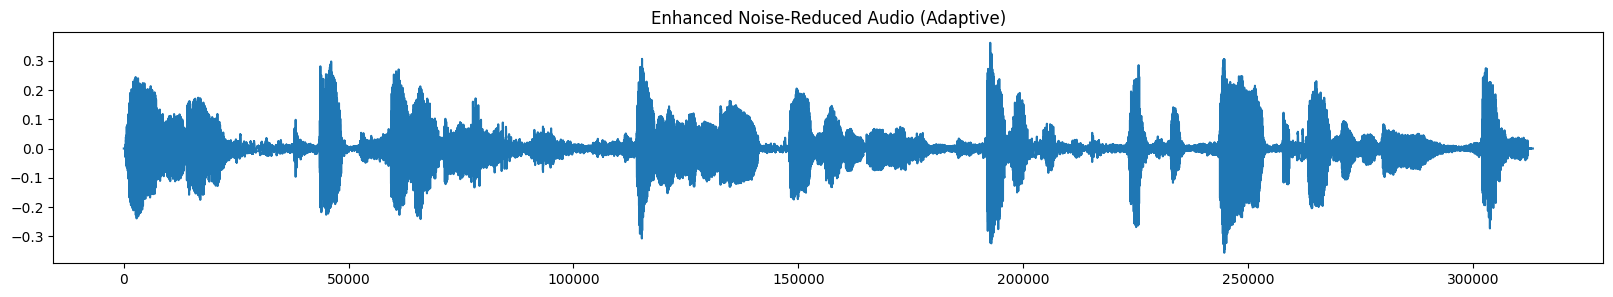

In [ ]:
import librosa
import noisereduce as nr
import IPython.display as ipd
import matplotlib.pyplot as plt

# Load the audio file
audio_path = "/content/WhatsApp Audio 2024-10-24 at 13.43.58_e98e5504.mp3"  # Path to your file
data, rate = librosa.load(audio_path, sr=None)  # Preserve original sample rate

# Display the original audio waveform
plt.figure(figsize=(20, 3))
plt.plot(data)
plt.title("Original Audio Waveform")
plt.show()

# Play the original audio
ipd.display(ipd.Audio(data=data, rate=rate))

# Enhanced adaptive noise reduction
reduced_noise_audio = nr.reduce_noise(y=data, sr=rate, prop_decrease=0.9)  # Adjusted parameter for stronger noise reduction

# Display the noise-reduced audio waveform
plt.figure(figsize=(20, 3))
plt.plot(reduced_noise_audio)
plt.title("Enhanced Noise-Reduced Audio (Adaptive)")
plt.show()

# Play the noise-reduced audio
ipd.display(ipd.Audio(data=reduced_noise_audio, rate=rate))
